# Study 1: Railcard Holder

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# <!-- Study done in Python using Pandas library, involved opening the original dataset, selecting relevent columns,
# and performing data cleaning tasks such as handling null values, eliminating duplicates, renaming columns, 
# and adjusting data types.  -->

# opening original data and data cleaning
# df = pd.read_csv("Questionnaire_data_rail_stream(1).csv")
# df.columns = df.iloc[0]
# df.columns = [str(col).replace(' ', '') for col in df.columns]
# df = df.drop(0)
# df = df.drop(0)
# df = df.loc[:, ~df.columns.duplicated(keep='first')]
# drop_columns = ["Q1othertxt"]
# df.drop(drop_columns, axis = 1, inplace = True)
# df.replace('999', pd.NA, inplace=True)
# df.fillna(method='ffill', inplace=True)

In [28]:
# opening the relevant data after data cleaning
railcard = pd.read_csv("railcard.csv")

In [29]:
railcard.head()

,railcard_yes,railcard_no,occup_student,occup_uniemp,occup_emp,occup_retired,occup_other
0,0,1,0,1,0,0,0
1,0,1,1,0,0,0,0
2,1,0,1,0,0,0,0
3,1,0,0,0,1,0,0
4,1,0,1,0,0,0,0


In [30]:
railcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   railcard_yes   369 non-null    int64
 1   railcard_no    369 non-null    int64
 2   occup_student  369 non-null    int64
 3   occup_uniemp   369 non-null    int64
 4   occup_emp      369 non-null    int64
 5   occup_retired  369 non-null    int64
 6   occup_other    369 non-null    int64
dtypes: int64(7)
memory usage: 20.3 KB


In [31]:
railcard.describe()

,railcard_yes,railcard_no,occup_student,occup_uniemp,occup_emp,occup_retired,occup_other
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,0.609756,0.390244,0.886179,0.070461,0.048780,0.008130,0.008130
std,0.488467,0.488467,0.318025,0.256269,0.215701,0.089922,0.089922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# count of unique value 
# railcard_yes column just for example
railcard["railcard_yes"].value_counts()

railcard_yes
1    225
0    144
Name: count, dtype: int64

## Research Question:

Does the occupation of an individual influence the likelihood of having a railcard for train travel?

### Justification:

- A nationwide fare reduction for rail transportation was instituted by Slovakia and Czechia for specific population segments 

Tomeš, Z., Fitzová, H., Pařil, V., Rederer, V., Kordová, Z. and Kasa, M., 2022. Fare discounts and free fares in long-distance public transport in central Europe. Case Studies on Transport Policy, 10(1), pp.507-517.

### Visualization

In [33]:
# Calculate column-wise sum to get frequency
frequencies = railcard.sum()

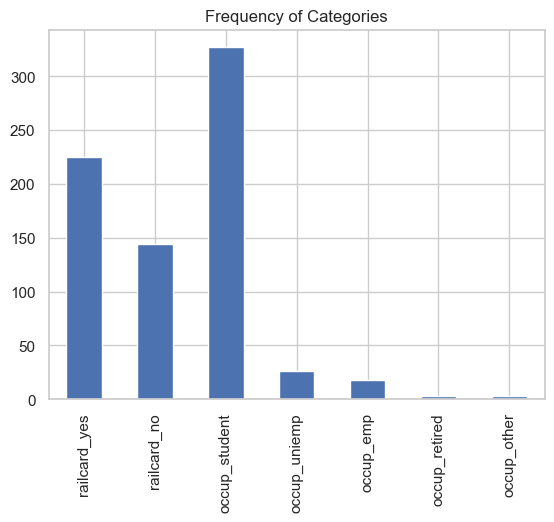

In [34]:
# Create a bar plot
frequencies.plot(kind='bar', title='Frequency of Categories')
plt.show()

The occupation category "occup_student" has the highest frequency above 300, indicating that the majority of the instances in the dataset come from student profile.

## Hypothesis Test

#### Null Hypothesis (H0): There is no significant association between occupation and having a railcard.

#### Alternative Hypothesis (H1): There is a significant association between occupation and having a railcard.

### Chi-Square Test

#### Contingency Table

In [35]:
# contingency table

# Choose one occupation column to represent occupation
occupation_column = railcard[['occup_student', 'occup_uniemp', 'occup_emp', 'occup_retired', 'occup_other']].idxmax(axis=1)

# Create a contingency table
contingency_table = pd.crosstab(railcard['railcard_yes'], occupation_column)

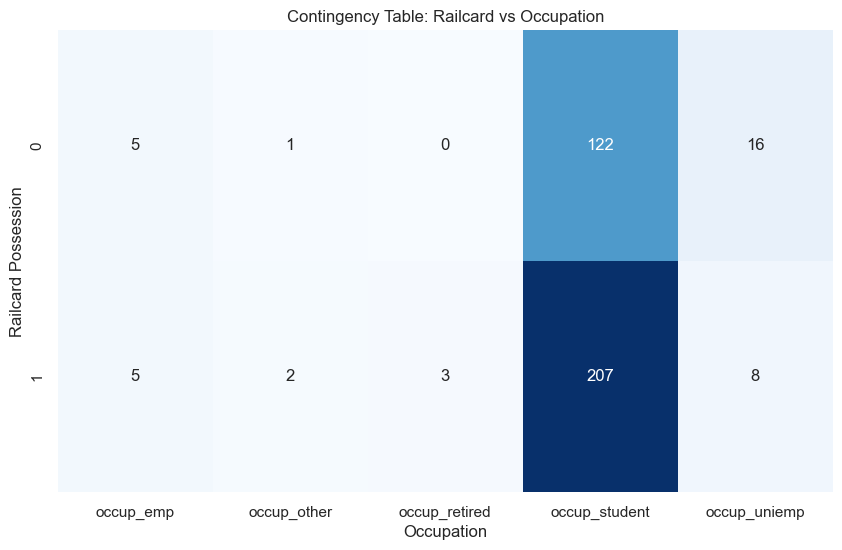

In [36]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table: Railcard vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Railcard Possession')
plt.show()

student has highest count with railcard possession 1 which represent "Yes". 

In [37]:
# Perform Chi-Square Test
chi2_stat, p_value, _, expected = chi2_contingency(contingency_table, correction=False)

In [50]:
# Output the results
print(f"Chi-square statistic: {chi2_stat}")

Chi-square statistic: 10.695360942249238


A substantial deviation from expected frequencies is indicated by the chi-square statistic of 10.695 with a p-value of 0.03, indicating a strong link between holding a railcard and occupation.

#### P-Value Approach

In [51]:
# Make a decision
significance_level = 0.05
print(f"P-value: {p_value}")
if p_value < significance_level:
    print("Reject the null hypothesis. There is a significant association between variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between variables.")

P-value: 0.030209736524472095
Reject the null hypothesis. There is a significant association between variables.


p value is less than 0.05 which is 0.030 it means we can reject the null hypothesis.

### Result

The null hypothesis rejected, indicating that there may be evidence of a significant connection between the variables in contingency table. There is likely reason to assume that the occupation categories in dataset are connected to the existence of a railcard.

#### Critical Value Approach

In [40]:
# based on critical value
# Degrees of freedom
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

In [41]:
degrees_of_freedom

4

In [42]:
# Find the critical value
critical_value = chi2.ppf(1 - significance_level, degrees_of_freedom)

print(f"Critical Value: {critical_value}")

Critical Value: 9.487729036781154


In [43]:
if critical_value < chi2_stat:
    print("Reject the null hypothesis. There is a significant association between variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between variables.")

Reject the null hypothesis. There is a significant association between variables.


Chi square stats values is greater than critical value indicating significance association between railcard holder and occupation.

### Residuals

In [44]:
# Fit the chi-square model
chi_square_model = sm.stats.Table(contingency_table)
residuals = chi_square_model.resid_pearson

In [45]:
residuals

col_0,occup_emp,occup_other,occup_retired,occup_student,occup_uniemp
railcard_yes,,,,,
0,0.550839,-0.159911,-0.742557,-0.587301,2.159009
1,-0.441436,0.128151,0.595076,0.470656,-1.730203


In [46]:
residuals_df = pd.DataFrame(residuals)

In [47]:
# Add 'railcard_yes' as a regular column
residuals_df['railcard_yes'] = [0, 1]

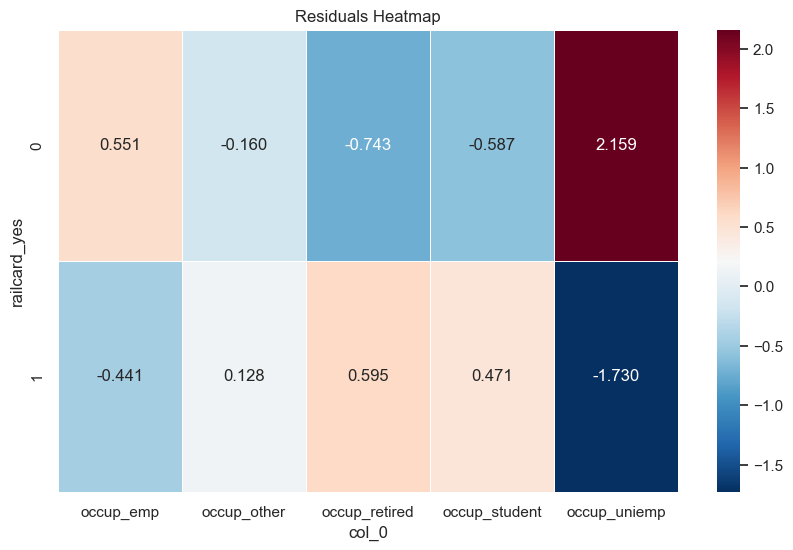

In [48]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(residuals_df.set_index('railcard_yes'), annot=True, cmap='RdBu_r', fmt=".3f", linewidths=.5)
plt.title('Residuals Heatmap')
plt.show()

Above heatmap shows that 'occup_student' which represent student has positive residual for railcard value 1 which means observed frequency is higher than expected so we can say that student more likely to have railcard. 

#### Distribution of individual with and without railcard

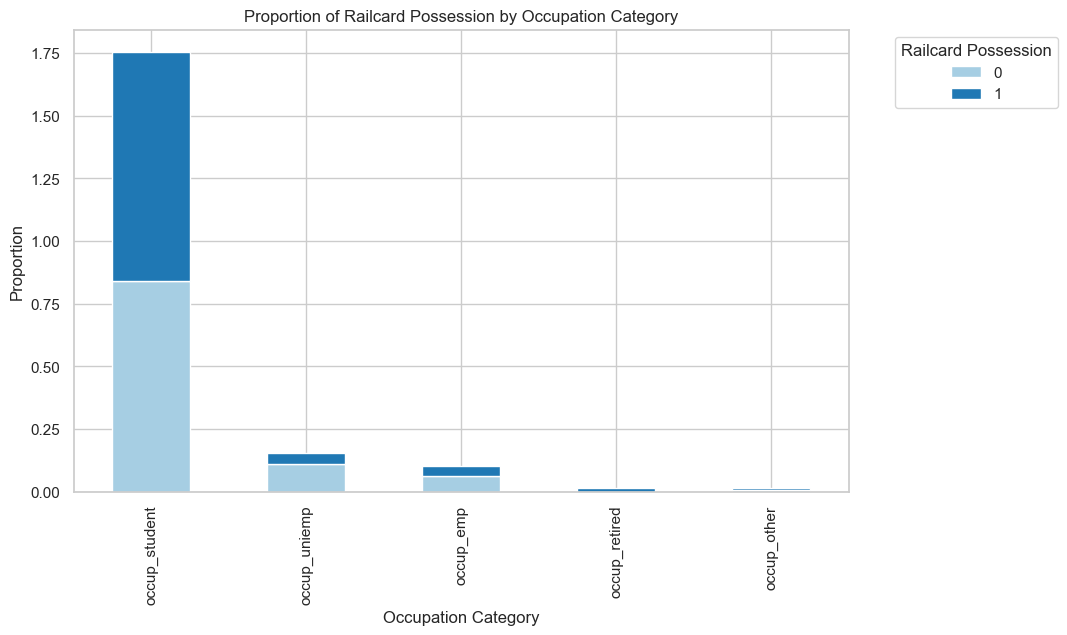

In [49]:
# Filter relevant columns
df_vis = railcard[['railcard_yes', 'occup_student', 'occup_uniemp', 'occup_emp', 'occup_retired', 'occup_other']]

# Calculate proportions
proportions = df_vis.groupby('railcard_yes').mean()

# Plotting
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom color palette
colors = ['#a6cee3', '#1f78b4']  # Blue for railcard_yes, Light blue for railcard_no

# Stacked bar chart with custom colors
proportions.T.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set labels and title
ax.set_xlabel('Occupation Category')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Railcard Possession by Occupation Category')

# Show the legend
ax.legend(title='Railcard Possession', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

This graph helps in interpreting the relative frequency of railcard ownership throughout each type of occupations, offering perceptions into possible correlations between occupation and railcard ownership.

### Interpretation

- Using their railcard benefits for train travel, students are more likely than those in other professions.

### Alignment with Literature

- It's possible that certain policies, laws, or travel habits are reason for students' choice for railcards.

### Limitations

- The dataset seems to be imbalanced leading to biased predictions

### Future Work

- Other demographic information like age, gender, income, location could offer a deeper understanding.

### Conclusion

- study offers insightful information about the relationship between having a railcard and occupation.

- The student variable's significant importance implies a more sophisticated understanding of travel behaviour and policy consequences.